In [1]:
import pandas as pd # type: ignore
from datetime import datetime # type: ignore
import numpy as np #type: ignore

import matplotlib # type: ignore
import matplotlib.pyplot as plt # type: ignore

from sklearn.metrics import mean_squared_error # type: ignore
from sklearn.utils.fixes import parse_version
from sklearn.inspection import permutation_importance

import seaborn as sns
import statsmodels

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

#from pyramid.arima import auto_arima
#from pmdarima.arima import auto_arima
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [2]:
df = pd.read_csv('datasets/dataset_PS_4.csv')
df = df.astype({'date': 'datetime64[ns]'})
# df.drop(columns=['irradiation', 'cloudiness', 'holiday', 'precipitation'], inplace=True)
df['shifted_consumption_168'] = df['consumption'].shift(168)
df['shifted_consumption_48'] = df['consumption'].shift(48)
df['hour'] = df['date'].dt.hour
df['weekDay'] = df['date'].dt.weekday

# sort by holidays
df = df.sort_values(by='holiday')

holidays_map = {holiday: i for i, holiday in enumerate(df['holiday'].unique())}
df['holiday'] = df['holiday'].map(holidays_map)

# sort holidays
df = df.sort_values(by='date')

df = df.fillna(df.mean())
df.index = df['date']
df.drop(columns=['date'], inplace=True)
df = df.iloc[:-29]
df

consumption_eles_forecast  consumption  temperature  \
date                                                                       
2022-01-01 01:00:00                      953.0       1018.0         -3.2   
2022-01-01 02:00:00                      906.0        975.0         -3.9   
2022-01-01 03:00:00                      874.0        944.0         -2.8   
2022-01-01 04:00:00                      870.0        936.0         -3.1   
2022-01-01 05:00:00                      892.0        952.0         -4.1   
...                                        ...          ...          ...   
2024-11-01 14:00:00                     1347.0        593.0         13.8   
2024-11-01 15:00:00                     1618.0        767.0         13.8   
2024-11-01 16:00:00                     1989.0        974.0         13.8   
2024-11-01 17:00:00                     2272.0       1071.0         13.8   
2024-11-01 18:00:00                     2378.0       1109.0         13.8   

                     precipitation  irradiation      price  volumes  \
date                                                                  
2022-01-01 01:00:00            0.0          0.0   51.44327   1084.7   
2022-01-01 02:00:00            0.0          0.0   55.91396   1071.1   
2022-01-01 03:00:00            0.0          0.0   46.94279   1065.7   
2022-01-01 04:00:00            0.0          0.0   37.67210   1062.8   
2022-01-01 05:00:00            0.0          0.0   39.70000   1070.0   
...                            ...          ...        ...      ...   
2024-11-01 14:00:00            0.0          0.0   70.48000   1169.7   
2024-11-01 15:00:00            0.0          0.0   95.96000   1582.4   
2024-11-01 16:00:00            0.0          0.0  132.07000   1828.5   
2024-11-01 17:00:00            0.0          0.0  135.33000   1919.2   
2024-11-01 18:00:00            0.0          0.0  133.99000   1788.6   

                     cloudiness  holiday  shifted_consumption_168  \
date                                                                
2022-01-01 01:00:00        37.0        7              1295.166309   
2022-01-01 02:00:00        37.0        7              1295.166309   
2022-01-01 03:00:00        37.0        7              1295.166309   
2022-01-01 04:00:00        37.0        7              1295.166309   
2022-01-01 05:00:00        37.0        7              1295.166309   
...                         ...      ...                      ...   
2024-11-01 14:00:00        83.0       10              1461.000000   
2024-11-01 15:00:00        83.0       10              1385.000000   
2024-11-01 16:00:00        83.0       10              1372.000000   
2024-11-01 17:00:00        83.0       10              1399.000000   
2024-11-01 18:00:00        83.0       10              1403.000000   

                     shifted_consumption_48  hour  weekDay  
date                                                        
2022-01-01 01:00:00             1294.016083     1        5  
2022-01-01 02:00:00             1294.016083     2        5  
2022-01-01 03:00:00             1294.016083     3        5  
2022-01-01 04:00:00             1294.016083     4        5  
2022-01-01 05:00:00             1294.016083     5        5  
...                                     ...   ...      ...  
2024-11-01 14:00:00              935.000000    14        4  
2024-11-01 15:00:00             1120.000000    15        4  
2024-11-01 16:00:00             1292.000000    16        4  
2024-11-01 17:00:00             1391.000000    17        4  
2024-11-01 18:00:00             1393.000000    18        4  

[24828 rows x 13 columns]

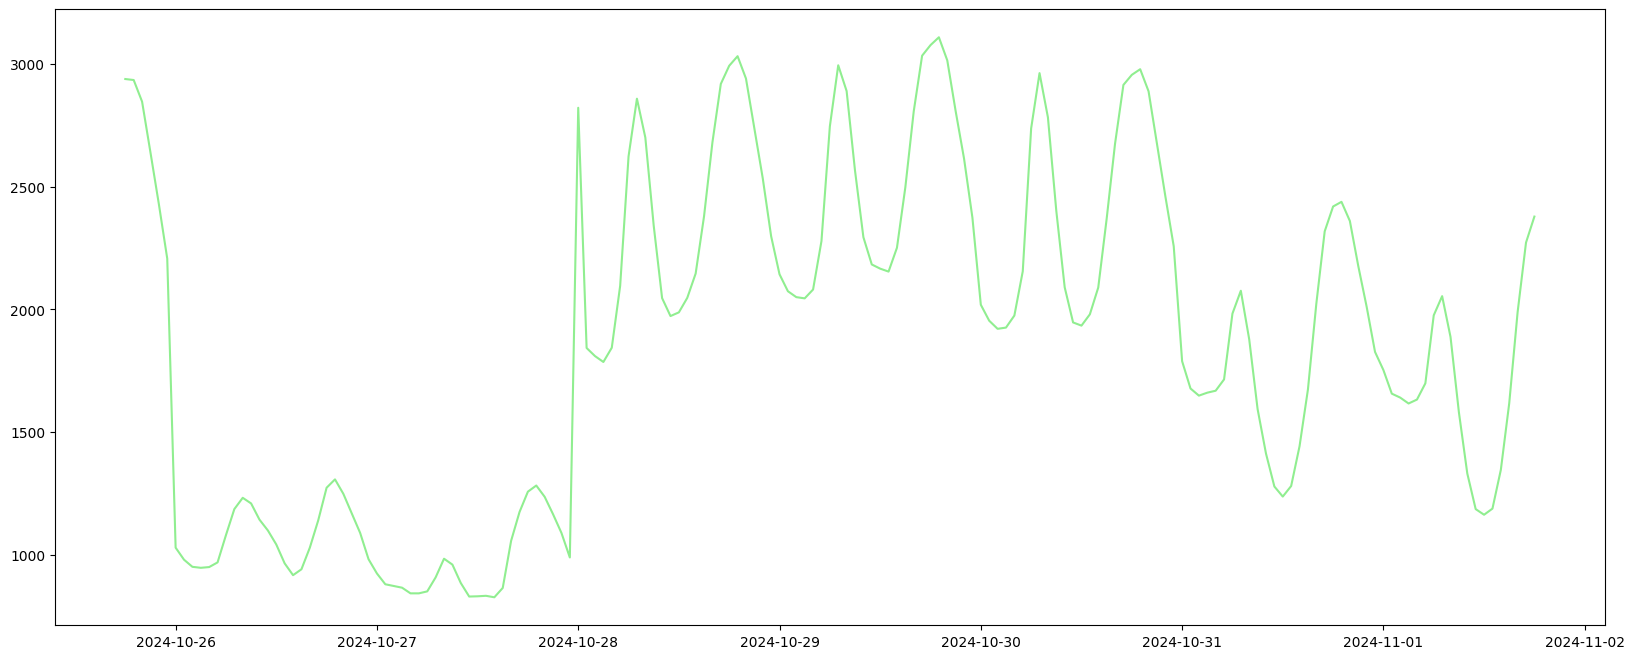

In [3]:
plt.figure(figsize=(20, 8))
# plt.acorr(df['consumption'], maxlags = 10, normed = True) 
plt.plot(df.iloc[-168:, 0], color = 'lightgreen', label = 'consumption')
# plt.plot(df.iloc[-168:, 1], color = 'r')
plt.show()

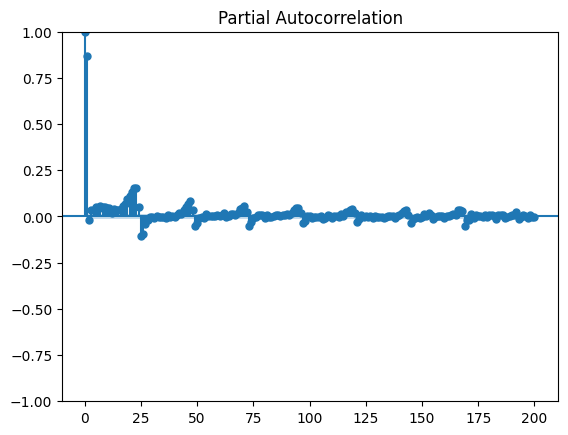

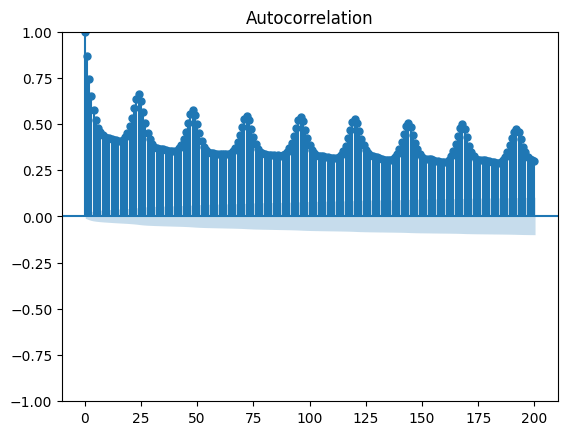

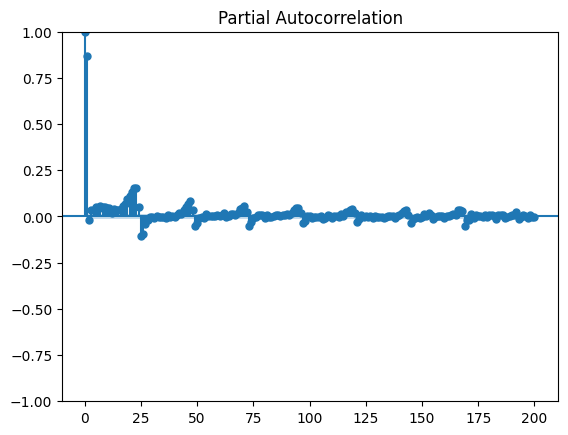

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot

plot_acf(df['volumes'], lags = 200)
plot_pacf(df['volumes'], lags = 200)

<Axes: >

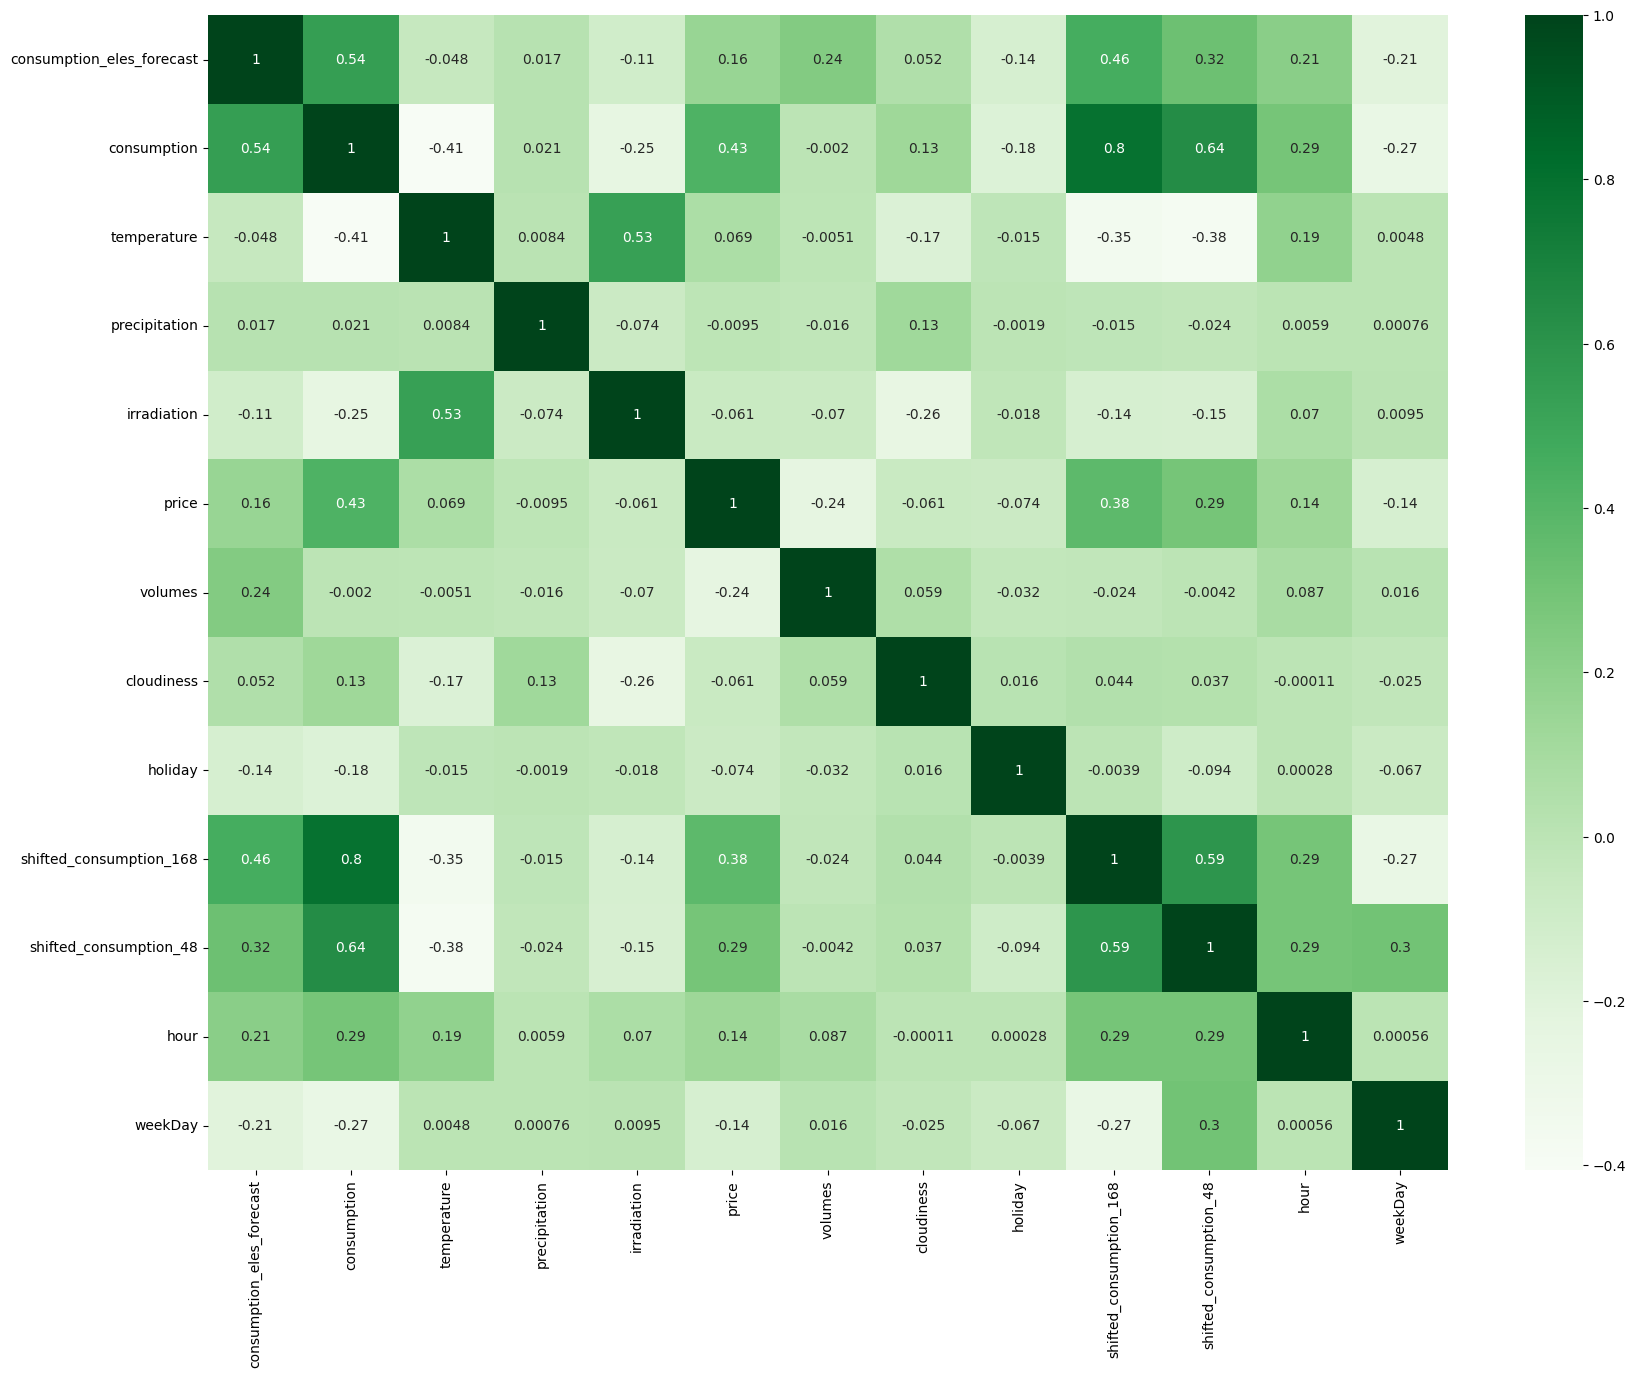

In [5]:
matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(matrix, cmap="Greens", annot=True)

In [7]:
import plotly.express as px
fig = px.scatter(x = df['volumes'].iloc[-168:],
    			 y = df['consumption'].iloc[-168:])
fig.show()

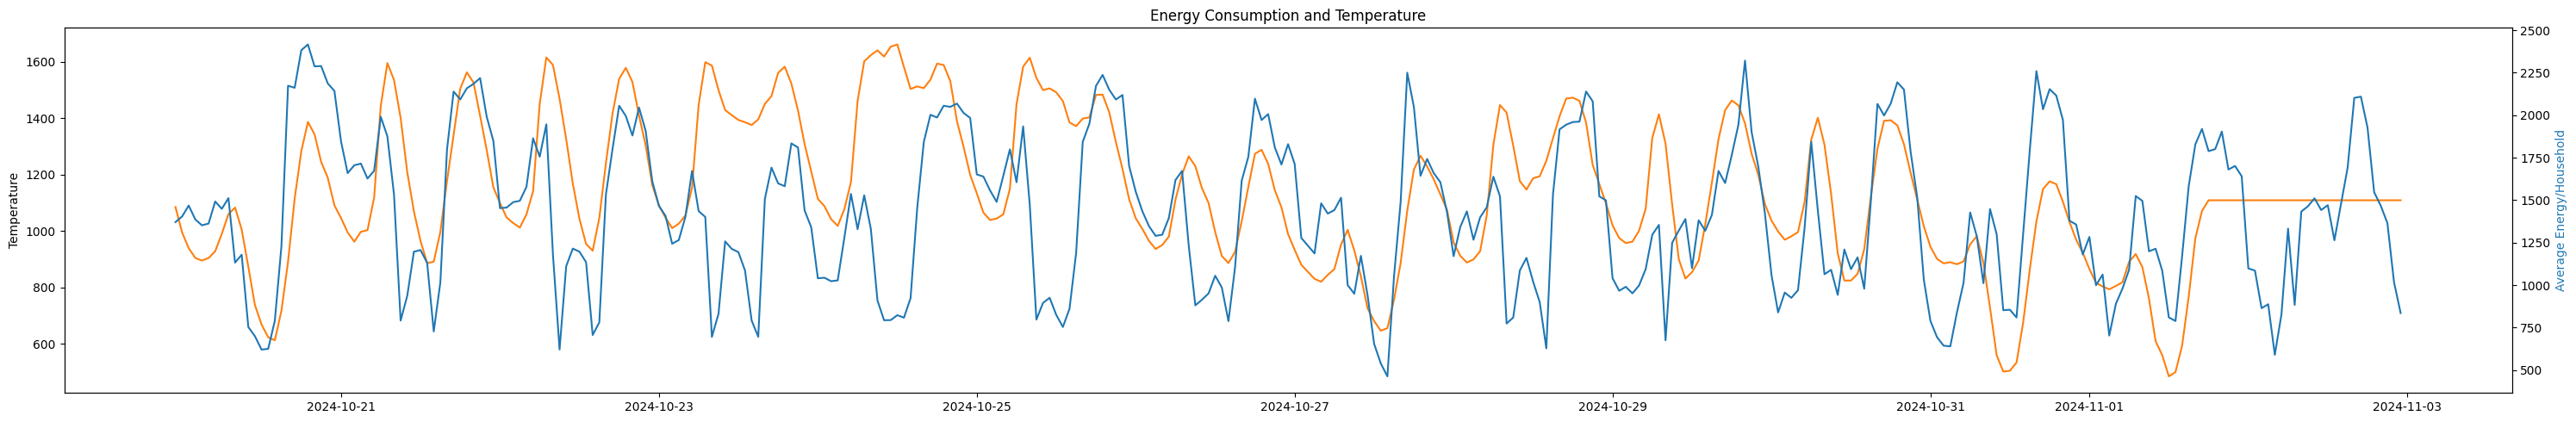

In [6]:
fig, ax1 = plt.subplots(figsize = (30,5))
ax1.plot(df['consumption'].iloc[-14*24:], color = 'tab:orange')
ax1.set_ylabel('Temperature')
ax2 = ax1.twinx()
ax2.plot(df['volumes'].iloc[-14*24:], color = 'tab:blue')
ax2.set_ylabel('Average Energy/Household',color = 'tab:blue')
plt.title('Energy Consumption and Temperature')
fig.tight_layout()
plt.show()

In [7]:
import plotly.express as px
fig = px.line(y = [df['consumption'], df['consumption_eles_forecast']], x = df.index)
fig.show()

<Axes: xlabel='y(t)', ylabel='y(t + 168)'>

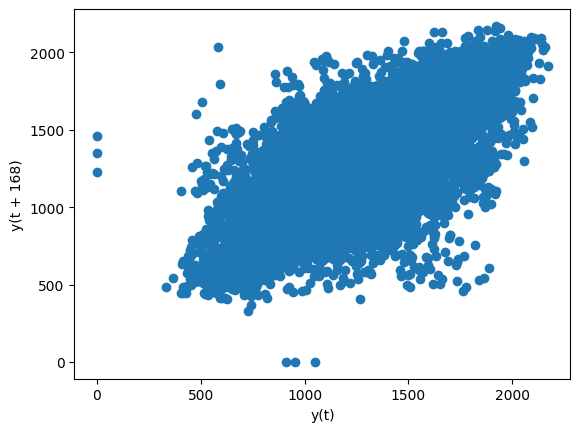

In [10]:
pd.plotting.lag_plot(df['consumption'], lag=168)

In [8]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error # type: ignore
from sktime.performance_metrics.forecasting import mean_squared_percentage_error # type: ignore

def evaluate_forecast(y_test, forecast):
	mse = root_mean_squared_error(y_test, forecast)
	mae = mean_absolute_error(y_test, forecast)
	mape = mean_absolute_percentage_error(y_test, forecast)
	rmspe = mean_squared_percentage_error(y_test, forecast, square_root=True)

	plt_title = 'MAE: {0:.2f}, RMSE: {1:.2f}, MAPE: {2:.2f}, RMSPE: {3:.2f}'.format(mae, mse, mape*100, rmspe*100)

	return plt_title

In [9]:
from statsforecast import StatsForecast
from statsforecast.models import __all__

cutoff_date = '2024-10-15'

# train set
df_train = df.iloc[df.index < cutoff_date]
df_test = df.iloc[df.index >= cutoff_date]

x_train = df_train[['shifted_consumption_168','hour','weekDay','shifted_consumption_48', 'temperature', 'holiday', 'cloudiness', 'precipitation', 'irradiation', 'price']]
x_test = df_test[['shifted_consumption_168','hour','weekDay','shifted_consumption_48', 'temperature', 'holiday', 'cloudiness', 'precipitation', 'irradiation', 'price']]
y_train = df_train['consumption']
y_test = df_test['consumption']

days_to_predict = df_test.shape[0]

d:\Projects\Programming\Gen-I Trading Challenge\Task 1\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



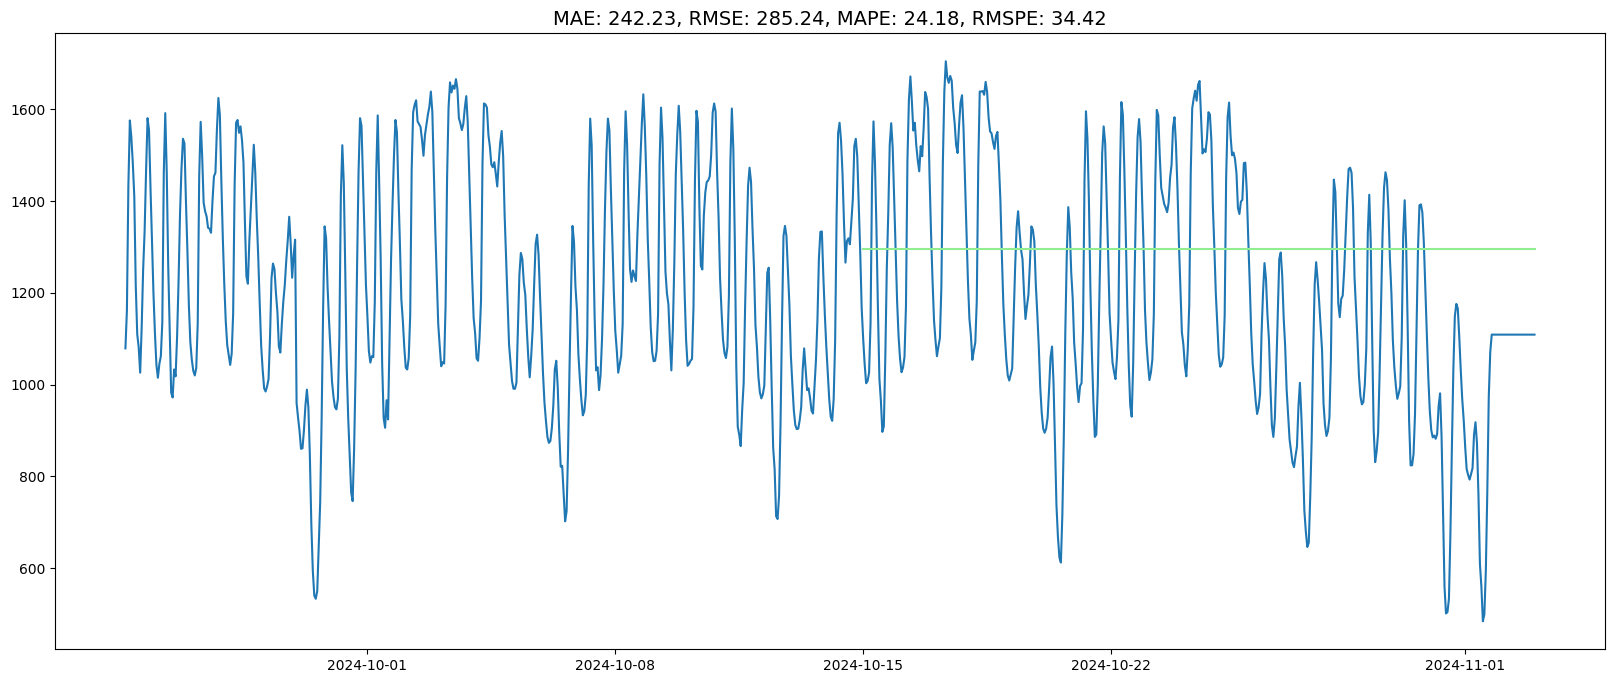

In [10]:
# HistoricAverage's usage example:
from statsforecast.models import HistoricAverage

# Define the model, fit and predict:
model = HistoricAverage()
model = model.fit(y = y_train, X=x_train)
predict = pd.DataFrame(model.predict(h = days_to_predict))
predict.index = df_test.index

fig, ax = plt.subplots(1, 1, figsize = (20, 8))
plt_title = evaluate_forecast(y_test, predict['mean'])
ax.set_title(plt_title, fontsize=14)
fig = plt.plot(df['consumption'].iloc[-days_to_predict - 500:])
fig = plt.plot(predict['mean'], color = 'lightgreen')
# fig = px.line(y = predict['mean'])

predictions = predict.copy()
predictions.rename(columns = {'mean': 'HistoricAverage'}, inplace = True)

d:\Projects\Programming\Gen-I Trading Challenge\Task 1\.venv\lib\site-packages\statsforecast\utils.py:307: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



HistoricAverage   Naive
date                                        
2024-10-15 00:00:00      1295.354848  1166.0
2024-10-15 01:00:00      1295.354848  1166.0
2024-10-15 02:00:00      1295.354848  1166.0
2024-10-15 03:00:00      1295.354848  1166.0
2024-10-15 04:00:00      1295.354848  1166.0
...                              ...     ...
2024-11-01 14:00:00      1295.354848  1166.0
2024-11-01 15:00:00      1295.354848  1166.0
2024-11-01 16:00:00      1295.354848  1166.0
2024-11-01 17:00:00      1295.354848  1166.0
2024-11-01 18:00:00      1295.354848  1166.0

[426 rows x 2 columns]

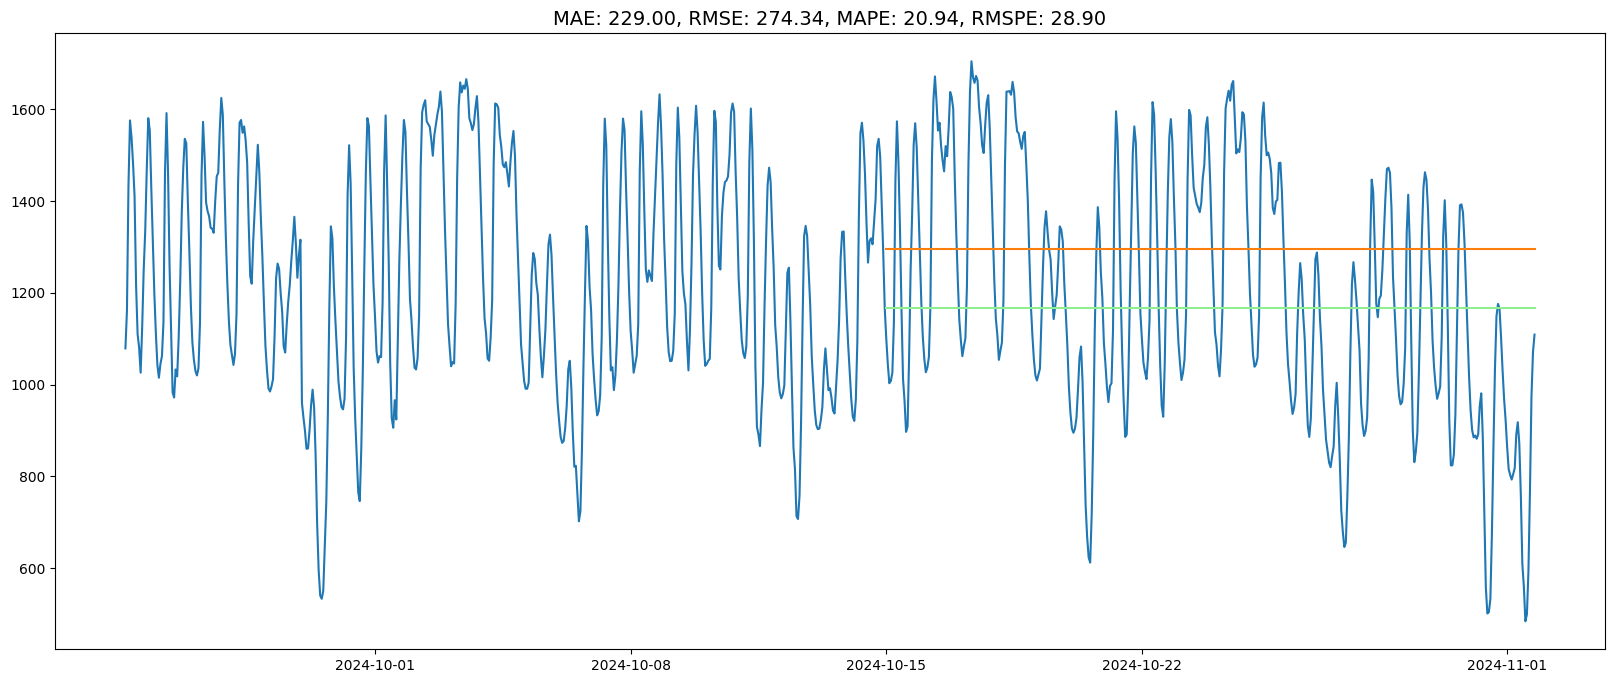

In [14]:
# HistoricAverage's usage example:
from statsforecast.models import Naive

# Define the model, fit and predict:
model = Naive()
model = model.fit(y = y_train)
predict = pd.DataFrame(model.predict(h = days_to_predict))
predict.index = df_test.index

fig, ax = plt.subplots(1, 1, figsize = (20, 8))
plt_title = evaluate_forecast(y_test, predict['mean'])
ax.set_title(plt_title, fontsize=14)
fig = plt.plot(df['consumption'].iloc[-days_to_predict - 500:])
fig = plt.plot(predictions['HistoricAverage'])
fig = plt.plot(predict['mean'], color = 'lightgreen')
# fig = px.line(y = predict['mean'])

predictions = pd.merge(predictions, predict, how = 'left', left_index = True, right_index = True)
predictions.rename(columns = {'mean': 'Naive'}, inplace = True)
predictions

KeyError: 'Naive'

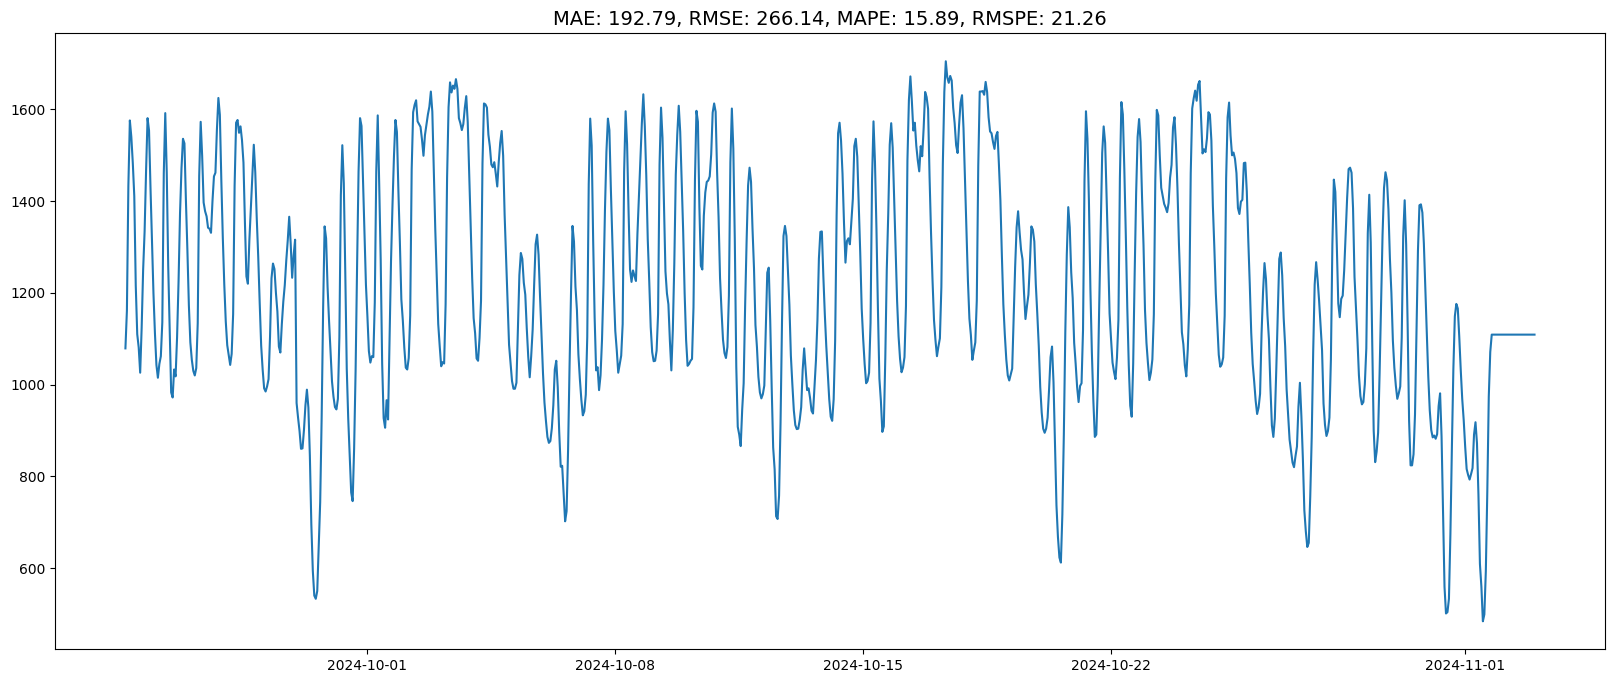

In [11]:
# HistoricAverage's usage example:
from statsforecast.models import SeasonalNaive

nr = int(91 * 24)

# Define the model, fit and predict:
model = SeasonalNaive(season_length=nr)
model = model.fit(y = y_train, X = x_train)
predict = pd.DataFrame(model.predict(h = days_to_predict, X = x_test))
predict.index = df_test.index

fig, ax = plt.subplots(1, 1, figsize = (20, 8))
plt_title = evaluate_forecast(y_test, predict['mean'])
ax.set_title(plt_title, fontsize=14)
fig = plt.plot(df['consumption'].iloc[-days_to_predict - 500:])
fig = plt.plot(predictions['Naive'])
fig = plt.plot(predict['mean'], color = 'lightgreen')
# fig = px.line(y = predict['mean'])

predict['residuals'] = df['consumption'] - predict['mean']

predictions = pd.merge(predictions, predict, how = 'left', left_index = True, right_index = True)
predictions.rename(columns = {'mean': 'SeasonalNaive'}, inplace = True)
predictions

In [16]:
px.line(predict['residuals'])

KeyError: 'residuals'

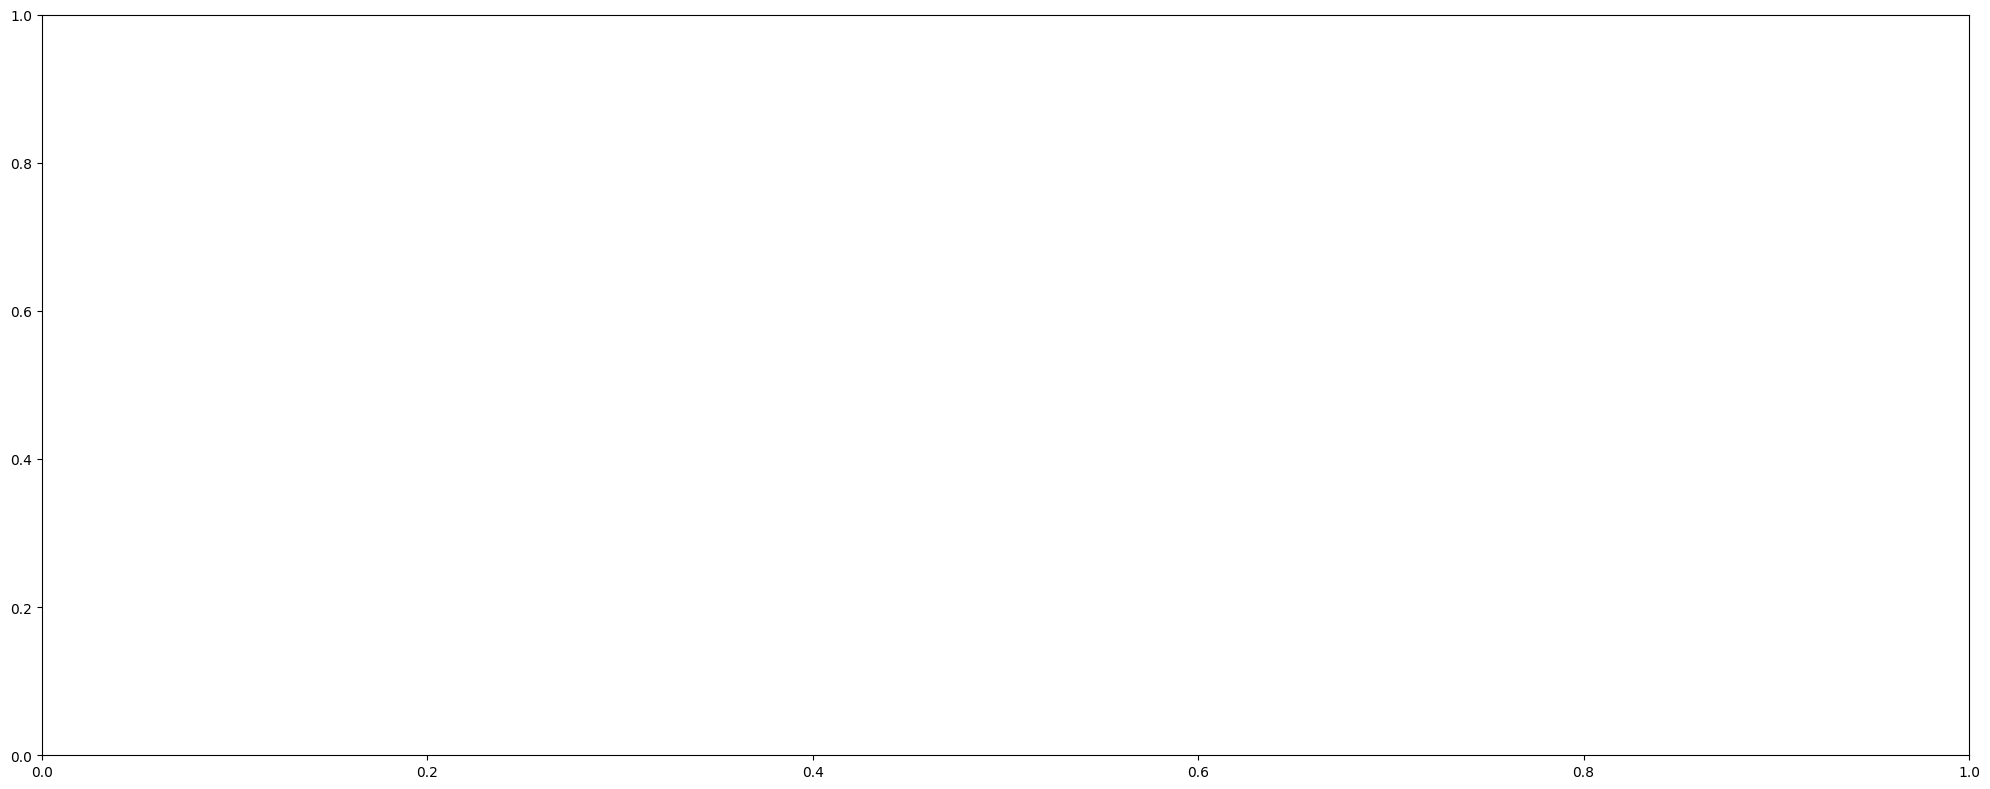

In [12]:
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(20, 8),
                        tight_layout = True)
 
axs.hist(predict['residuals'], bins = 20)

# Specify graph features:
axs.set_title('Histogram of residuals', fontsize=14)
axs.set_ylabel('count', fontsize=20)
axs.set_xlabel('residuals', fontsize=20)
 
# Show plot
plt.show()

In [13]:
import math

ticker_data = predict["residuals"]
ticker_data_acf = [ticker_data.autocorr(i) for i in range(1,25)]

test_df = pd.DataFrame([ticker_data_acf]).T
test_df.columns = ['Autocorr']
test_df.index += 1
test_df.plot(kind='bar', width = 0.05, figsize = (20, 4))

# Statisfical significance.
n = len(predict['residuals'])
plt.axhline(y = 2/math.sqrt(n), color = 'r', linestyle = 'dashed')
plt.axhline(y = -2/math.sqrt(n), color = 'r', linestyle = 'dashed')

# Adding plot title.
plt.title("Residuals from the Naive method")
 
# Providing x-axis name.
plt.xlabel("lag[1]")

# Providing y-axis name.
plt.ylabel("ACF")

KeyError: 'residuals'

In [19]:
# HistoricAverage's usage example:
from statsforecast.models import MSTL

nr = int(91 * 24)

# Define the model, fit and predict:
model = MSTL(season_length=nr)
model = model.fit(y = y_train)
predict = pd.DataFrame(model.predict(h = days_to_predict))
predict.index = df_test.index

fig, ax = plt.subplots(1, 1, figsize = (20, 8))
plt_title = evaluate_forecast(y_test, predict['mean'])
ax.set_title(plt_title, fontsize=14)
fig = plt.plot(df['consumption'].iloc[-days_to_predict - 500:])
fig = plt.plot(predictions['Naive'])
fig = plt.plot(predict['mean'], color = 'lightgreen')
# fig = px.line(y = predict['mean'])
ax.legend(prop={'size': 15})

predictions = pd.merge(predictions, predict, how = 'left', left_index = True, right_index = True)
predictions.rename(columns = {'mean': 'MSTL'}, inplace = True)
predictions

: 

: 

In [14]:
dfdfdf = pd.merge(df_test, predict['residuals'], how = 'left', left_index = True, right_index = True)
dfdfdf

KeyError: 'residuals'

In [15]:
matrix = dfdfdf.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(matrix, cmap="Greens", annot=True)

NameError: name 'dfdfdf' is not defined

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='weekDay', y='consumption', data=dfdfdf)
plt.show()

NameError: name 'dfdfdf' is not defined

In [17]:
endog = df_train['consumption']
# exog = sm.add_constant(df_train['price'])

mod = sm.tsa.statespace.SARIMAX(endog = endog, order=(7,1,1), seasonal_order=(1,1, 0, 12), trend='c')
model_fit = mod.fit()
model_fit.summary()

d:\Projects\Programming\Gen-I Trading Challenge\Task 1\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

d:\Projects\Programming\Gen-I Trading Challenge\Task 1\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



KeyboardInterrupt: 

NameError: name 'model_fit' is not defined

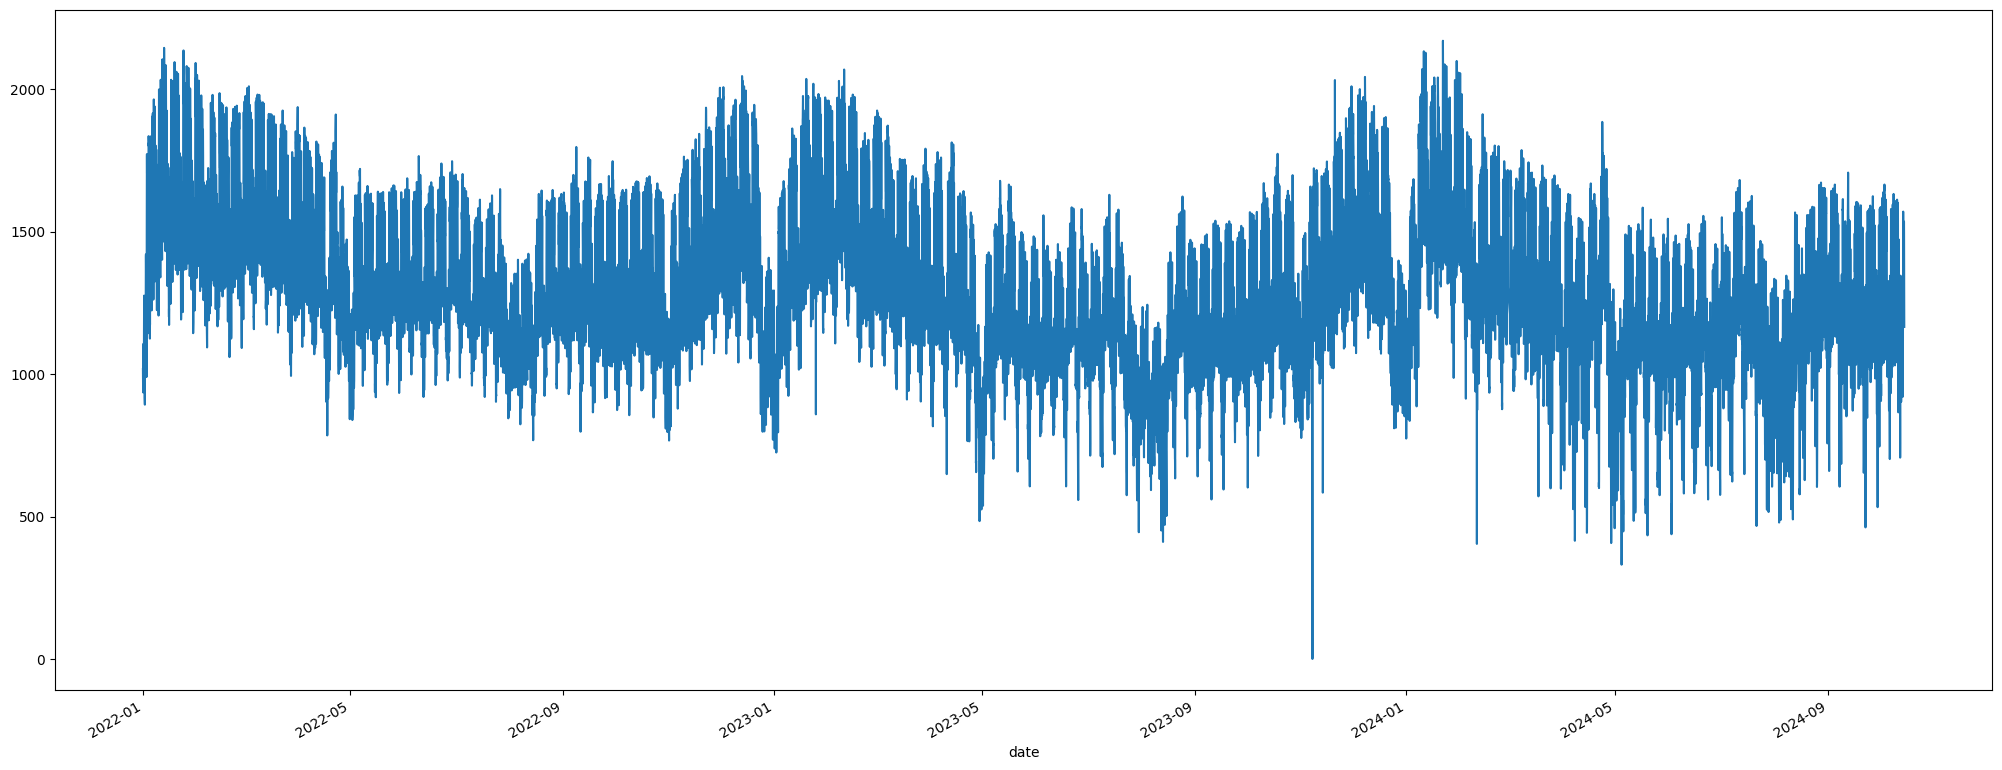

In [18]:
df_train['consumption'].plot(figsize=(25,10))
model_fit.fittedvalues.plot()
plt.show()

d:\Projects\Programming\Gen-I Trading Challenge\Task 1\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

d:\Projects\Programming\Gen-I Trading Challenge\Task 1\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\patri\AppData\Local\Temp\ipykernel_19964\3399355532.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='date'>

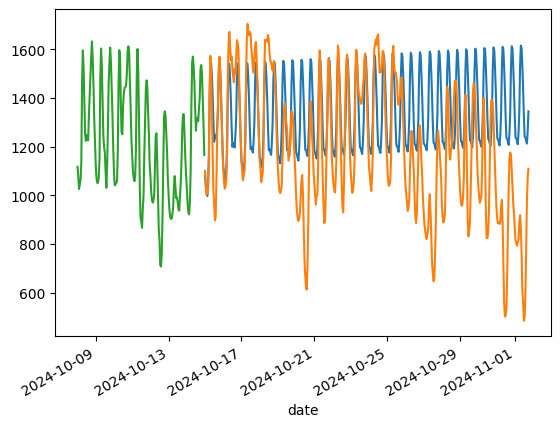

In [91]:
predict = model_fit.predict(start = len(df_train), end = len(df_train)+len(df_test)-1,)
df_test['predicted'] = predict.values
df_test['predicted'].plot()
df_test['consumption'].plot()
df_train['consumption'].iloc[-168:].plot()

In [4]:
from statsforecast import StatsForecast
from statsforecast.models import MSTL, AutoARIMA, SeasonalNaive
from statsforecast.utils import AirPassengers as ap

mstl = MSTL(
    season_length=[24, 24 * 7], # seasonalities of the time series 
    trend_forecaster=AutoARIMA() # model used to forecast trend
)

d:\Projects\Programming\Gen-I Trading Challenge\Task 1\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
df_pass = df.copy()
df_pass.drop(columns=['consumption_eles_forecast', 'cloudiness', 'holiday', 'precipitation',
	   'price', 'shifted_consumption_48', 'shifted_consumption_168', 'hour', 'weekDay',
	   'irradiation', 'temperature'], inplace=True)
df_pass['ds'] = df_pass.index
df_pass.rename(columns={'consumption': 'y'}, inplace=True)
df_pass['unique_id'] = 'Hourly consumption'
df_pass

y  volumes                  ds           unique_id
date                                                                        
2022-01-01 01:00:00  1018.0   1084.7 2022-01-01 01:00:00  Hourly consumption
2022-01-01 02:00:00   975.0   1071.1 2022-01-01 02:00:00  Hourly consumption
2022-01-01 03:00:00   944.0   1065.7 2022-01-01 03:00:00  Hourly consumption
2022-01-01 04:00:00   936.0   1062.8 2022-01-01 04:00:00  Hourly consumption
2022-01-01 05:00:00   952.0   1070.0 2022-01-01 05:00:00  Hourly consumption
...                     ...      ...                 ...                 ...
2024-11-01 14:00:00   593.0   1169.7 2024-11-01 14:00:00  Hourly consumption
2024-11-01 15:00:00   767.0   1582.4 2024-11-01 15:00:00  Hourly consumption
2024-11-01 16:00:00   974.0   1828.5 2024-11-01 16:00:00  Hourly consumption
2024-11-01 17:00:00  1071.0   1919.2 2024-11-01 17:00:00  Hourly consumption
2024-11-01 18:00:00  1109.0   1788.6 2024-11-01 18:00:00  Hourly consumption

[24828 rows x 4 columns]

In [45]:
sf = StatsForecast(
    models=[mstl], # model used to fit each time series 
    freq='H', # frequency of the data
)

In [46]:
sf = sf.fit(df=df_pass)

In [47]:
sf.fitted_[0, 0].model_

data        trend  seasonal24  seasonal168   remainder
0      1018.0  1266.733602 -304.890669    15.954284   40.202783
1       975.0  1269.213288 -341.260494    10.832765   36.214441
2       944.0  1271.690106 -339.807635     2.743983    9.373547
3       936.0  1274.164028 -328.387605   -22.760327   12.983904
4       952.0  1276.635025 -232.036767   -78.958816  -13.639442
...       ...          ...         ...          ...         ...
24823   593.0   790.882797 -147.692260   126.374056 -176.564592
24824   767.0   787.623817  -25.808890   125.914213 -120.729140
24825   974.0   784.359202  112.667927   105.526226  -28.553355
24826  1071.0   781.089014  220.551412    81.916778  -12.557204
24827  1109.0   777.813313  271.816044    53.284549    6.086094

[24828 rows x 5 columns]

<Figure size 2000x1000 with 0 Axes>

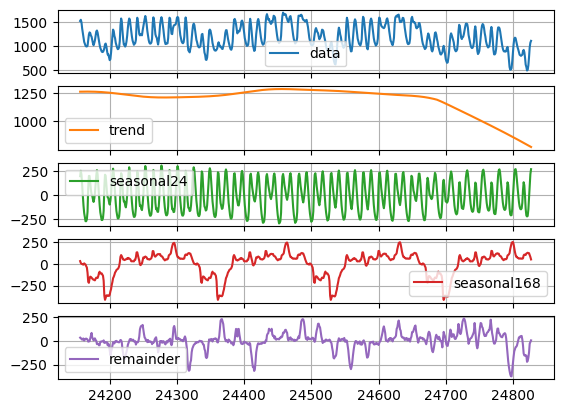

In [48]:
figure = plt.figure(figsize=(20, 10))
sf.fitted_[0, 0].model_.tail(24 * 28).plot(subplots=True, grid=True)
plt.show()

In [49]:
forecasts = sf.predict(h=24, level=[90])
forecasts.head()

d:\Projects\Programming\Gen-I Trading Challenge\Task 1\.venv\lib\site-packages\utilsforecast\processing.py:384: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

d:\Projects\Programming\Gen-I Trading Challenge\Task 1\.venv\lib\site-packages\utilsforecast\processing.py:438: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

d:\Projects\Programming\Gen-I Trading Challenge\Task 1\.venv\lib\site-packages\statsforecast\core.py:494: FutureWarning:

In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.



ds         MSTL   MSTL-lo-90   MSTL-hi-90
unique_id                                                                    
Hourly consumption 2024-11-01 19:00:00  1090.568449  1044.457082  1136.679816
Hourly consumption 2024-11-01 20:00:00  1027.553032   954.442566  1100.663498
Hourly consumption 2024-11-01 21:00:00   929.415627   834.909907  1023.921346
Hourly consumption 2024-11-01 22:00:00   849.096896   739.113321   959.080472
Hourly consumption 2024-11-01 23:00:00   767.952059   647.044705   888.859413

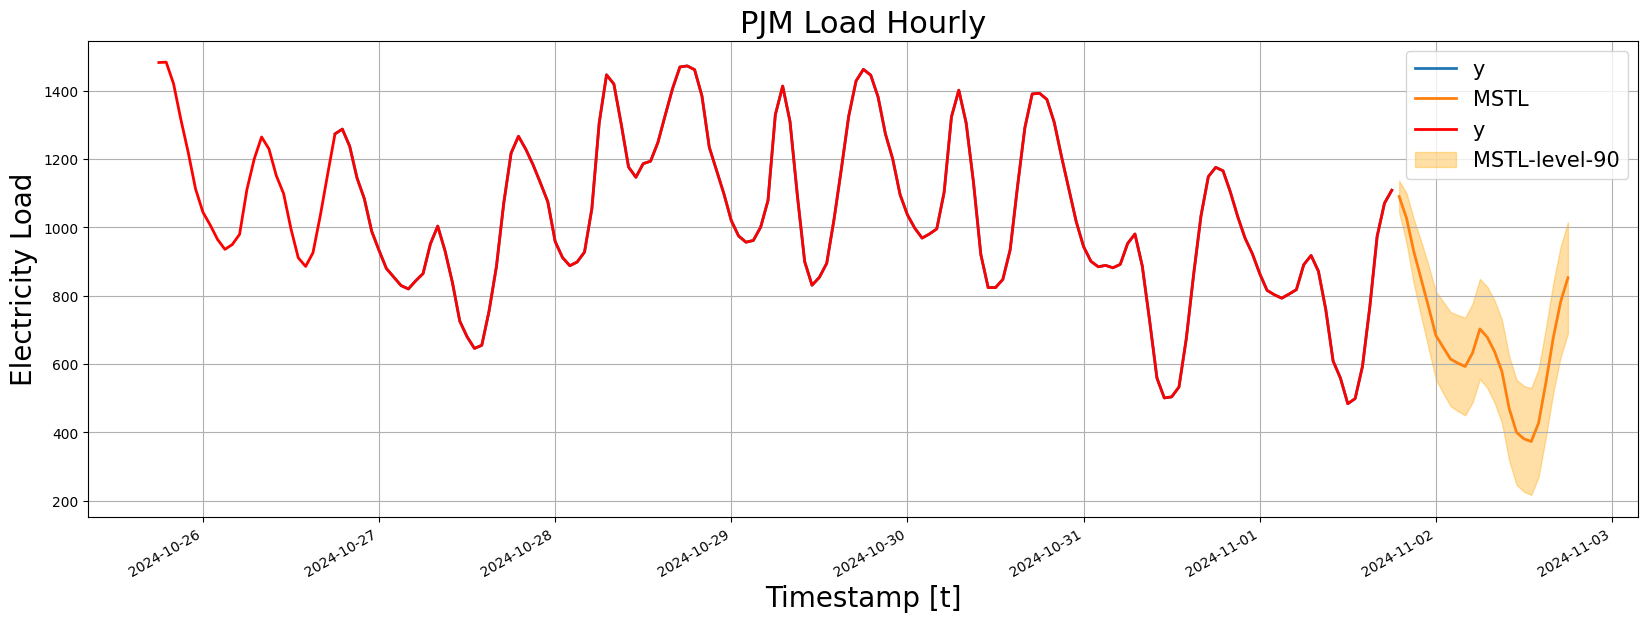

In [50]:
_, ax = plt.subplots(1, 1, figsize = (20, 7))
df_plot = pd.concat([df_pass, forecasts]).set_index('ds').tail(24 * 7)
df_plot[['y', 'MSTL']].plot(ax=ax, linewidth=2)
df_pass['y'].tail(168).plot(ax=ax, linewidth=2, color='red')
ax.fill_between(df_plot.index, 
                df_plot['MSTL-lo-90'], 
                df_plot['MSTL-hi-90'],
                alpha=.35,
                color='orange',
                label='MSTL-level-90')
ax.set_title('PJM Load Hourly', fontsize=22)
ax.set_ylabel('Electricity Load', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

In [51]:
def plot_forecasts(y_hist, y_true, y_pred, models):
    _, ax = plt.subplots(1, 1, figsize = (20, 7))
    y_true = y_true.merge(y_pred, how='left', on=['unique_id', 'ds'])
    df_plot = pd.concat([y_hist, y_true]).set_index('ds').tail(24 * 7)
    df_plot[['y'] + models].plot(ax=ax, linewidth=2)
    colors = ['orange', 'green', 'red']
    for model, color in zip(models, colors):
        ax.fill_between(df_plot.index, 
                        df_plot[f'{model}-lo-90'], 
                        df_plot[f'{model}-hi-90'],
                        alpha=.35,
                        color=color,
                        label=f'{model}-level-90')
    ax.set_title('PJM Load Hourly', fontsize=22)
    ax.set_ylabel('Electricity Load', fontsize=20)
    ax.set_xlabel('Timestamp [t]', fontsize=20)
    ax.legend(prop={'size': 15})
    ax.grid()


In [52]:
from time import time

df_test = df_pass.tail(24)
df_train = df_pass.drop(df_test.index)

sf = StatsForecast(
    models=[mstl, SeasonalNaive(season_length=24)], # add SeasonalNaive model to the list
    freq='H'
)

init = time()
sf = sf.fit(df=df_train)
forecasts_test = sf.predict(h=len(df_test), level=[90])
end = time()
forecasts_test.head()

d:\Projects\Programming\Gen-I Trading Challenge\Task 1\.venv\lib\site-packages\utilsforecast\processing.py:384: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

d:\Projects\Programming\Gen-I Trading Challenge\Task 1\.venv\lib\site-packages\utilsforecast\processing.py:438: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

d:\Projects\Programming\Gen-I Trading Challenge\Task 1\.venv\lib\site-packages\statsforecast\core.py:494: FutureWarning:

In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.



ds         MSTL   MSTL-lo-90   MSTL-hi-90  \
unique_id                                                                       
Hourly consumption 2024-10-31 19:00:00  1186.478793  1140.340074  1232.617513   
Hourly consumption 2024-10-31 20:00:00  1136.214058  1063.045561  1209.382554   
Hourly consumption 2024-10-31 21:00:00  1056.197660   961.605709  1150.789611   
Hourly consumption 2024-10-31 22:00:00   955.520181   845.433499  1065.606863   
Hourly consumption 2024-10-31 23:00:00   870.468179   749.452084   991.484273   

                    SeasonalNaive  SeasonalNaive-lo-90  SeasonalNaive-hi-90  
unique_id                                                                    
Hourly consumption         1375.0          1068.202531          1681.797469  
Hourly consumption         1308.0          1001.202531          1614.797469  
Hourly consumption         1207.0           900.202531          1513.797469  
Hourly consumption         1112.0           805.202531          1418.797469  
Hourly consumption         1017.0           710.202531          1323.797469

In [53]:
time_mstl = (end - init) / 60
print(f'MSTL Time: {time_mstl:.2f} minutes')

MSTL Time: 0.61 minutes


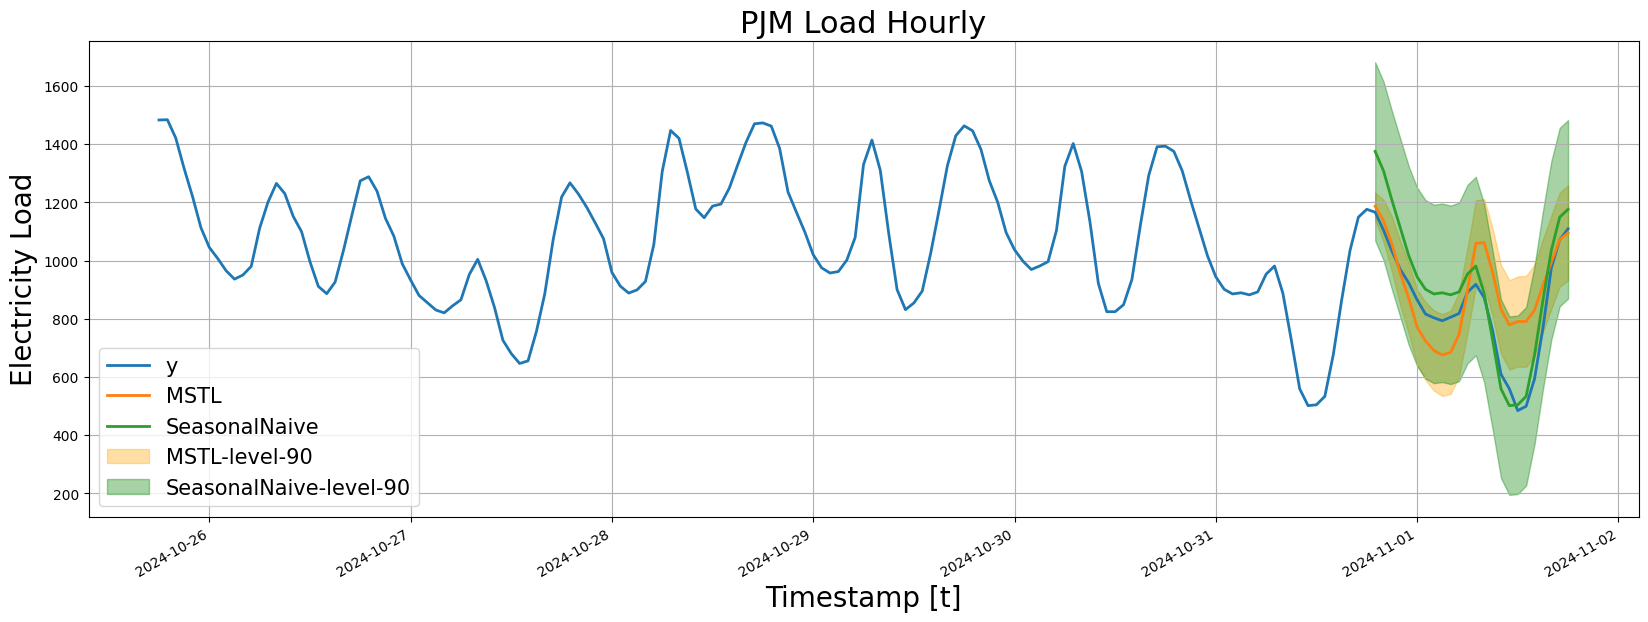

In [54]:
plot_forecasts(df_train, df_test, forecasts_test, models=['MSTL', 'SeasonalNaive'])

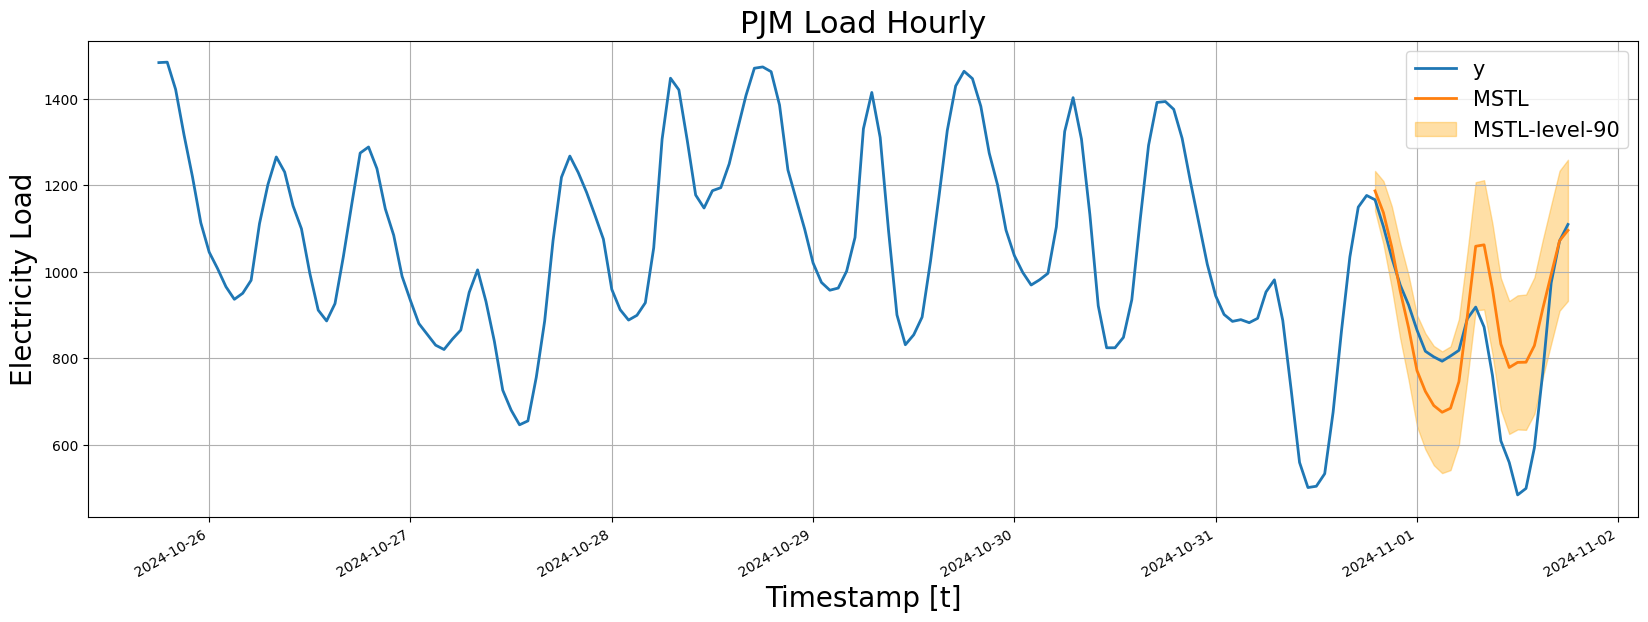

In [55]:
plot_forecasts(df_train, df_test, forecasts_test, models=['MSTL'])

In [56]:
from datasetsforecast.losses import (
    mae, mape, mase, rmse, smape
)

In [57]:
def evaluate_performace(y_hist, y_true, y_pred, models):
    y_true = y_true.merge(y_pred, how='left', on=['unique_id', 'ds'])
    evaluation = {}
    for model in models:
        evaluation[model] = {}
        for metric in [mase, mae, mape, rmse, smape]:
            metric_name = metric.__name__
            if metric_name == 'mase':
                evaluation[model][metric_name] = metric(y_true['y'].values, 
                                                 y_true[model].values, 
                                                 y_hist['y'].values, seasonality=24)
            else:
                evaluation[model][metric_name] = metric(y_true['y'].values, y_true[model].values)
    return pd.DataFrame(evaluation).T

In [58]:
evaluate_performace(df_train, df_test, forecasts_test, models=['MSTL', 'SeasonalNaive'])


mase         mae       mape        rmse      smape
MSTL           0.889544  114.412666  17.205197  147.112212  15.127412
SeasonalNaive  0.659568   84.833333   9.751033   98.462768   9.300322

In [59]:
from prophet import Prophet

# create prophet model
prophet = Prophet(interval_width=0.9)
init = time()
prophet.fit(df_train)
# produce forecasts
future = prophet.make_future_dataframe(periods=len(df_test), freq='H', include_history=False)
forecast_prophet = prophet.predict(future)
end = time()
# data wrangling
forecast_prophet = forecast_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_prophet.columns = ['ds', 'Prophet', 'Prophet-lo-90', 'Prophet-hi-90']
forecast_prophet.insert(0, 'unique_id', 'PJM_Load_hourly')
forecast_prophet.head()

01:38:34 - cmdstanpy - INFO - Chain [1] start processing
01:38:50 - cmdstanpy - INFO - Chain [1] done processing
d:\Projects\Programming\Gen-I Trading Challenge\Task 1\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



unique_id                  ds      Prophet  Prophet-lo-90  \
0  PJM_Load_hourly 2024-10-31 19:00:00  1541.227228    1300.743761   
1  PJM_Load_hourly 2024-10-31 20:00:00  1513.159344    1274.104208   
2  PJM_Load_hourly 2024-10-31 21:00:00  1421.367300    1170.723545   
3  PJM_Load_hourly 2024-10-31 22:00:00  1311.406261    1064.640259   
4  PJM_Load_hourly 2024-10-31 23:00:00  1221.120126     965.085076   

   Prophet-hi-90  
0    1781.652647  
1    1763.002296  
2    1678.825072  
3    1568.412502  
4    1476.932839

In [60]:
time_prophet = (end - init) / 60
print(f'Prophet Time: {time_prophet:.2f} minutes')

Prophet Time: 0.35 minutes


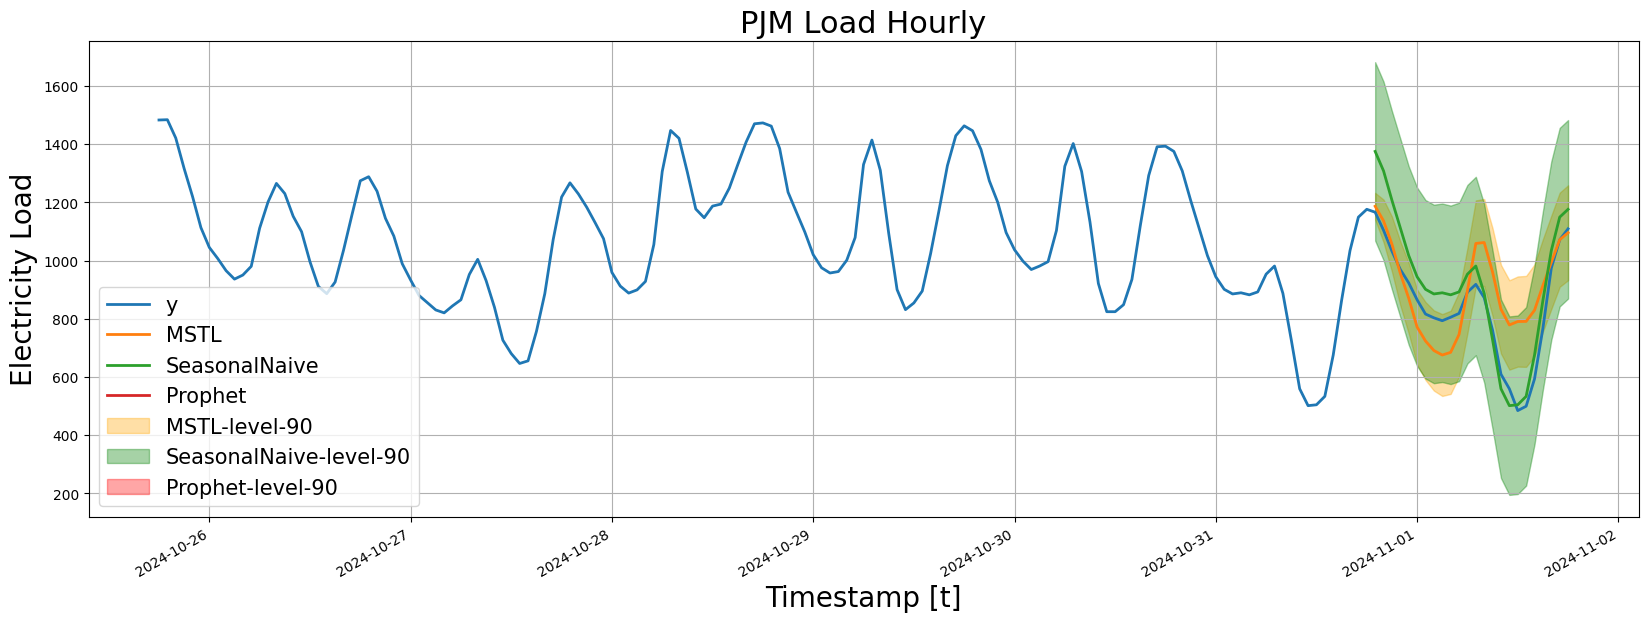

In [61]:
forecasts_test = forecasts_test.merge(forecast_prophet, how='left', on=['unique_id', 'ds'])
plot_forecasts(df_train, df_test, forecasts_test, models=['MSTL', 'SeasonalNaive', 'Prophet'])

In [62]:
evaluate_performace(df_train, df_test, forecasts_test, models=['MSTL', 'Prophet', 'SeasonalNaive'])

d:\Projects\Programming\Gen-I Trading Challenge\Task 1\.venv\lib\site-packages\datasetsforecast\losses.py:71: RuntimeWarning:

Mean of empty slice

d:\Projects\Programming\Gen-I Trading Challenge\Task 1\.venv\lib\site-packages\datasetsforecast\losses.py:118: RuntimeWarning:

Mean of empty slice



mase         mae       mape        rmse      smape
MSTL           0.889544  114.412666  17.205197  147.112212  15.127412
Prophet             NaN         NaN   0.000000         NaN   0.000000
SeasonalNaive  0.659568   84.833333   9.751033   98.462768   9.300322

In [6]:
import os
from statsforecast import StatsForecast

# this makes it so that the outputs of the predict methods have the id as a column 
# instead of as the index
os.environ['NIXTLA_ID_AS_COL'] = '1'

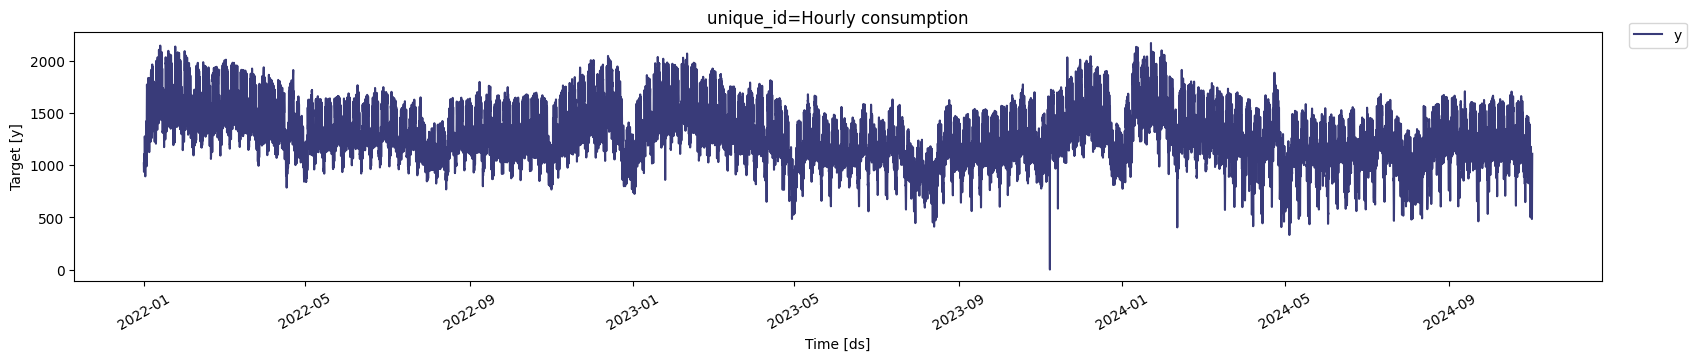

In [7]:
StatsForecast.plot(df_pass)

In [8]:
Y_ts = df_pass.copy()
Y_ts.drop(columns=['volumes'], inplace=True)
Y_ts.head()

y                  ds           unique_id
date                                                               
2022-01-01 01:00:00  1018.0 2022-01-01 01:00:00  Hourly consumption
2022-01-01 02:00:00   975.0 2022-01-01 02:00:00  Hourly consumption
2022-01-01 03:00:00   944.0 2022-01-01 03:00:00  Hourly consumption
2022-01-01 04:00:00   936.0 2022-01-01 04:00:00  Hourly consumption
2022-01-01 05:00:00   952.0 2022-01-01 05:00:00  Hourly consumption

In [9]:
X_ts = df_pass.copy()
X_ts.drop(columns=['y'], inplace=True)
X_ts.head()

volumes                  ds           unique_id
date                                                                
2022-01-01 01:00:00   1084.7 2022-01-01 01:00:00  Hourly consumption
2022-01-01 02:00:00   1071.1 2022-01-01 02:00:00  Hourly consumption
2022-01-01 03:00:00   1065.7 2022-01-01 03:00:00  Hourly consumption
2022-01-01 04:00:00   1062.8 2022-01-01 04:00:00  Hourly consumption
2022-01-01 05:00:00   1070.0 2022-01-01 05:00:00  Hourly consumption

In [10]:
# Extract dates for train and test set 
dates = Y_ts['ds'].unique()
dtrain = dates[:-28]
dtest = dates[-28:]

Y_train = Y_ts.query('ds in @dtrain')
Y_test = Y_ts.query('ds in @dtest') 

X_train = X_ts.query('ds in @dtrain') 
X_test = X_ts.query('ds in @dtest')

In [11]:
train = Y_train.merge(X_ts, how = 'left', on = ['unique_id', 'ds']) 
train.head()

y                  ds           unique_id  volumes
0  1018.0 2022-01-01 01:00:00  Hourly consumption   1084.7
1   975.0 2022-01-01 02:00:00  Hourly consumption   1071.1
2   944.0 2022-01-01 03:00:00  Hourly consumption   1065.7
3   936.0 2022-01-01 04:00:00  Hourly consumption   1062.8
4   952.0 2022-01-01 05:00:00  Hourly consumption   1070.0

In [12]:
X_test.head()

volumes                  ds           unique_id
date                                                                
2024-10-31 15:00:00   1793.4 2024-10-31 15:00:00  Hourly consumption
2024-10-31 16:00:00   2259.4 2024-10-31 16:00:00  Hourly consumption
2024-10-31 17:00:00   2034.8 2024-10-31 17:00:00  Hourly consumption
2024-10-31 18:00:00   2153.6 2024-10-31 18:00:00  Hourly consumption
2024-10-31 19:00:00   2115.7 2024-10-31 19:00:00  Hourly consumption

In [16]:
from statsforecast.models import AutoARIMA

# Create a list with the model and its instantiation parameters 
models = [AutoARIMA(season_length=24*7)]

sf = StatsForecast(
    models=models, 
    freq='H', 
    n_jobs=1,
)

In [ ]:
horizon = 28
level = [95]

fcst = sf.forecast(df=train, h=horizon, X_df=X_test, level=level)
fcst.head()

In [ ]:
StatsForecast.plot(Y_ts, fcst, max_insample_length=28*2)

In [ ]:
res = Y_test.merge(fcst, how='left', on=['unique_id', 'ds'])
res.head()

mae = abs(res['y']-res['AutoARIMA']).mean()
print('The MAE with exogenous regressors is '+str(round(mae,2)))